# R Project: Market Basket Analysis

Dalam project R kali ini, akan dilakukan analisis untuk menentukan kombinasi produk yang tepat sesuai dengan kebiasaan *customer* yang berbelanja di sebuah toko retail. Hasil dari analisis tersebut diharapkan dapat menjadi acuan untuk memberikan penawaran terhadap *customer* untuk membeli produk tambahan sesuai dari kebiasaan para *customer* sebelumnya, atau bisa dijadikan acuan untuk membuat pemaketan produk.

Akan diguanakan algoritma **Apriori** yang merupakan algoritma **asosiasi/association rules (arules)** dalam Machine Learning. Secara teknis, algoritma apriori akan mencari tingkat asosiasi antar item di dalam banyak kombinasi kelompok data secara otomatis. Kombinasi ini juga bisa disusun dengan suatu aturan (rule) asosiasi "Jika membeli ini produk A maka akan membeli produk B"

## Membaca File Transaksi

### Sebagai Tipe Dataframe

In [1]:
transaksi_df <- read.csv("https://academy.dqlab.id/dataset/data_transaksi.txt", sep="\t")

In [4]:
# Menampilkan data transaksi 
head(transaksi_df,10)

Kode.Transaksi,Item
#01,Teh Celup
#01,Sirup
#01,Pet Food
#02,Teh Celup
#02,Gula
#03,Sirup
#03,Pet Food
#04,Teh Celup
#04,Sirup
#05,Teh Celup


Dari dataframe tersebut, terdapat dua kolom (Kode.Transaksi dan Item). Kode.Transaksi berisikan sejumlah kode transaksi. Apabila kode transaksinya sama, maka dapat diartikan bahwa transaksi tersebut dilakukan dalam waktu yang sama. Serta kolom item yang berisikan nama produk yang dibeli oleh *customer*.

### Sebagai Tipe Transactions

In [5]:
# Import library
library('arules')

Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



In [6]:
# Memasukkan data transaksi ke dalam variable transaksi
transaksi <- read.transactions(file = "https://academy.dqlab.id/dataset/data_transaksi.txt",
                              format = 'single',
                              sep =  '\t',
                              cols = c(1,2),
                              skip = 1)

* **file** : parameter untuk menampung source dari data transaksi
* **format** : terdapat dua jenis format, 'single' dan 'basket'. 'single', data transaksi dibagi (minimal 2 kolom) berdasarkan transaksi pada produk. 'basket', ketika produk data yang digunakan dikumpulkan dalam satu kolom dan pencatatan transaksi masuk dilakukan perbaris
* **sep**: kode pemisah, '\t' untuk tabular
* **cols**: kolom yang digunakan untuk analisis
* **skip**: melewati satu baris yang merupakan baris yang diguanakan sebagai header

In [8]:
transaksi 

transactions in sparse format with
 10 transactions (rows) and
 4 items (columns)

In [9]:
# Menampilkan kode transaksi unik 
transaksi@itemsetInfo

transactionID
#01
#02
#03
#04
#05
#06
#07
#08
#09
#10


In [10]:
# Menampilkan data transaksi dalam bentuk matriks
transaksi@data

4 x 10 sparse Matrix of class "ngCMatrix"
                        
[1,] . | . . | . . . | |
[2,] | . | . . | | . . |
[3,] | . | | | . | . . |
[4,] | | . | | | | | | .

Berikut adalah penjelasan hasilnya:

- **4 x 10** :  artinya terdapat 4 item dan 10 transaksi.
- **[1,]** s/d **[4,]** : artinya index yang mewakili tiap item dalam transaksi:
```        labels
1         Gula
2     Pet Food
3        Sirup
4    Teh Celup
```
dengan demikian, item Gula diwakili [1,], Pet Food diwakili [2,], dan seterusnya.
- Simbol tanda titik .  menunjukkan item tidak ada di transaksi.
- Simbol garis lurus |  menunjukkan bahwa item ada di transaksi.


#### Menampilkan Jumlah Kemunculan Produk per-Transaksi

Gula  Pet Food     Sirup Teh Celup 
      0.4       0.5       0.6       0.8

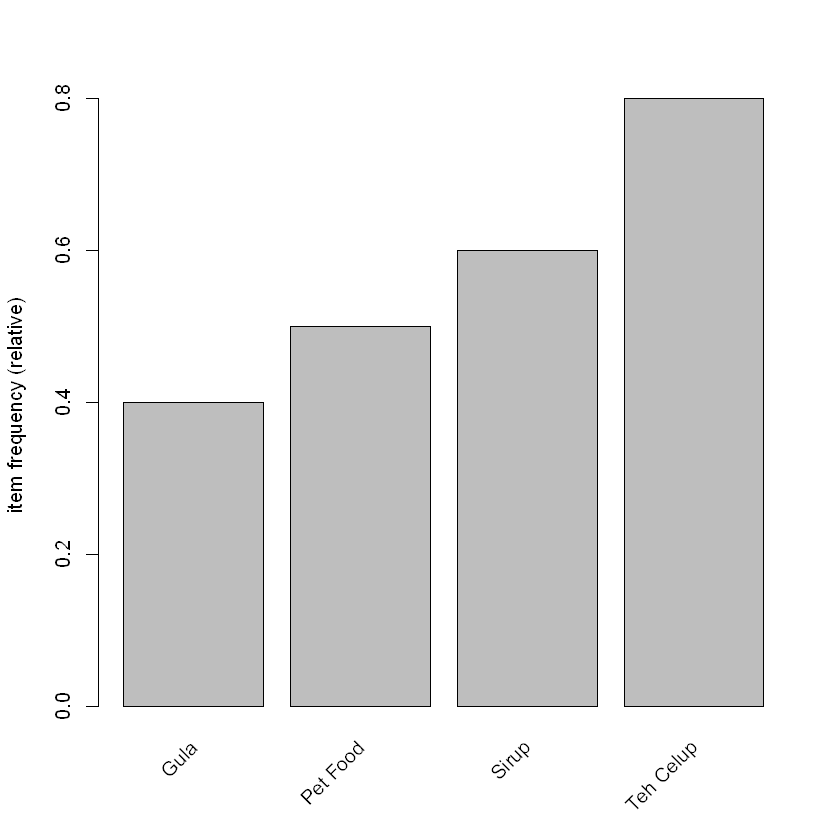

In [15]:
itemFrequency(transaksi)
itemFrequencyPlot(transaksi)

Hasil ini menunjukkan bahwa frekuensi kemunculan Gula adalah 0.4 atau 40 persen dari porsi seluruh transaksi yang ada, Pet Food menempati 50 persen, dan seterusnya. Untuk menampilkan angka yang sebenarnya dari kemunculan produk, digunakan:

Gula  Pet Food     Sirup Teh Celup 
        4         5         6         8

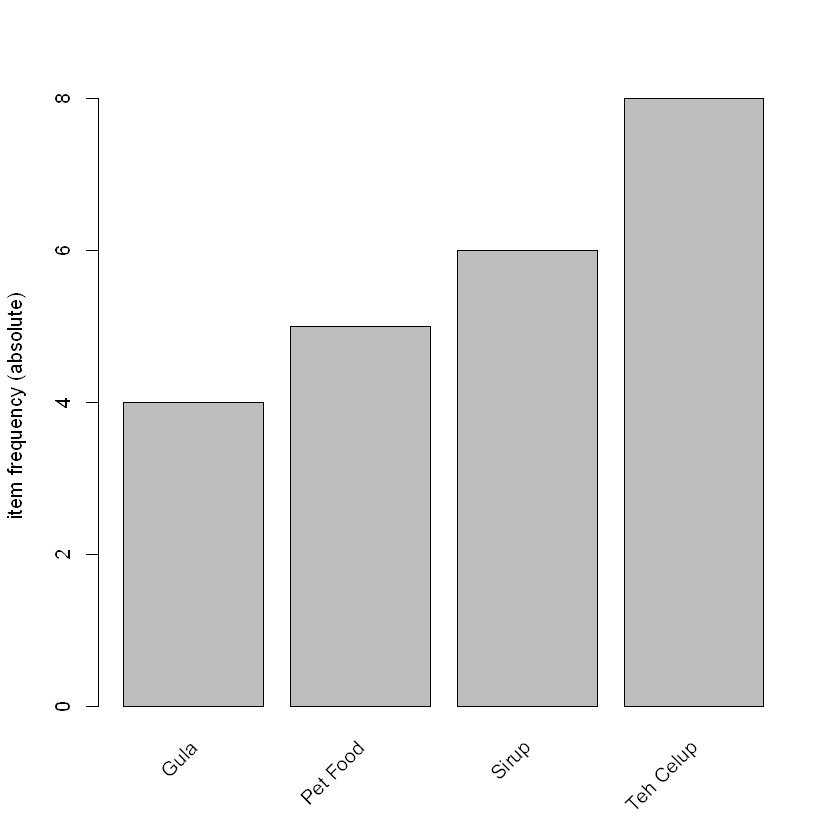

In [16]:
itemFrequency(transaksi, type = 'absolute')
itemFrequencyPlot(transaksi, type = 'absolute')

Ini artinya Gula memiliki kemunculan 4 kali dari seluruh transaksi yang ada, Pet Food muncul sebanyak 5 kali, Sirup sebanyak 6 kali, dan Teh Celup sebanyak 8 kali.

#### Mana 3 item yang memiliki jumlah terbanyak di seluruh transaksi?

In [18]:
data_item <- itemFrequency(transaksi, type = 'absolute')

# Melakukan sorting
data_item <- sort(data_item, decreasing = TRUE)

# Mengambil 3 item pertama
data_item <- data_item[1:3]

# Konversi ke dataframe
data_item <- data.frame("Nama Produk" = names(data_item),
                       "Jumlah" = data_item,
                       row.names = NULL)

#Menulis File Statistik Top 3
write.csv(data_item, file="top3_item_retail.txt", eol = "\r\n")

# Menampilkan
data_item

Nama.Produk,Jumlah
Teh Celup,8
Sirup,6
Pet Food,5


#### Melihat Itemset per Transaksi

Tiap transaksi terdiri atas beberapa item atau itemset. Pada praktek sebelumnya, kita baru melihat visualisasi dan sebaran matrix dari tiap transaksi namun masih sulit dicerna.

Untuk melihat notasi itemset yang lebih baik dan mudah dimengerti kita bisa menggunakan function **inspect**.

Penggunaan function ini juga sederhana. Seperti terlihat pada contoh berikut dimana kita inspect variable transaksi kita.

In [20]:
inspect(transaksi)

     items                      transactionID
[1]  {Pet Food,Sirup,Teh Celup} #01          
[2]  {Gula,Teh Celup}           #02          
[3]  {Pet Food,Sirup}           #03          
[4]  {Sirup,Teh Celup}          #04          
[5]  {Gula,Sirup,Teh Celup}     #05          
[6]  {Pet Food,Teh Celup}       #06          
[7]  {Pet Food,Sirup,Teh Celup} #07          
[8]  {Teh Celup}                #08          
[9]  {Gula,Teh Celup}           #09          
[10] {Gula,Pet Food,Sirup}      #10          


Ini merupakan hasil dari transaksi yang terdapat berbagai kombinasi produk yang dibeli per transaksinya. Sebagai contoh: *Pet Food,Sirup,Teh Celup* berada pada transaksi #01 dan seterusnya. Ini juga selaras dengan data transaksi yang ada pada **transaksi_df** sebelumnya. 

#### Menghasilkan Rules dengan Apriori

In [22]:
mba <- apriori(transaksi)
mba

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[4 item(s), 10 transaction(s)] done [0.00s].
sorting and recoding items ... [4 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 3 rules 

Hasilnya, 3 rules dibuat dari data transaksi tersebut

#### Menampilkan Rules yang Dihasilkan

In [24]:
inspect(mba)

    lhs                rhs         support confidence coverage lift     count
[1] {}              => {Teh Celup} 0.8     0.8        1.0      1.000000 8    
[2] {Pet Food}      => {Sirup}     0.4     0.8        0.5      1.333333 4    
[3] {Gula,Pet Food} => {Sirup}     0.1     1.0        0.1      1.666667 1    


Terlihat kalau variable **mba** menyimpan tiga rules dengan kolom-kolom berikut:
- **lhs**: itemset di bagian kiri (left hand side)
- **rhs**: itemset di bagian kanan (right hand side)
- **support**, **confidence dan lift**: metrik-metrik yang digunakan untuk menilai kualitas dari rule. Umumnya semakin besar semakin baik.

Jika dilihat, sepertinya rule kedua terlihat menarik. Mengapa? Hal tersebut disebabkan oleh nilai support yang mencapai angka 0.4 atau 40% dari populasi yang ada atau terdapat 4 dari 10 transaksi yang menggunakan rule/kombinasi tersebut. Nilai lift juga berada di atas 1, yang artinya rule ini memiliki asosisasi yagn tinggi antar itemset.

Untuk rule pertama, tidak menarik. Hal ini dikarenakan terdapat satu item saja yang tidak menunjukkan adanya kombinasi.

Untuk rule ketiga, memiliki support 0,1 atau terdapat 1 dari 10 transaksi yang mencerminkan rule ini.

Apa makna dari *rule* jika ingin diaplikasikan?

Artinya ada beberapa opsi *action item* yang bisa kita lakukan:

- rekomendasikan kepada setiap pelanggan yang membeli Pet Food untuk membeli Sirup.
- rak display Pet Food dan Sirup bisa didekatkan.
- Pet Food dan Sirup dipaketkan bersama dan dijual dengan harga khusus.